<a href="https://colab.research.google.com/github/sahilfaizal01/YOLOv7-and-YOLOv8/blob/main/Pothole_Detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [ ]:
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
!nvidia-smi

Thu May 25 17:30:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=48ebd95e812f7496ca7d913fe39ef9fbd9dc2616bf69fb6875275cb8f8a05ce8
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Succes

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets


In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pwd

/content/datasets


# **Importing the dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4v0m0Q44ghy9SpeYcnuN")
project = rf.workspace("aegis").project("pothole-detection-i00zy")
dataset = project.version(10).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pothole-Detection--10 in yolov5pytorch:: 100%|██████████| 6992/6992 [00:02<00:00, 3458.18it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/Pothole-Detection--10


# **Training the model using YOLOv8 medium(m) model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Pothole-Detection--10/data.yaml epochs=70 imgsz=640

/content
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Pothole-Detection--10/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_

In [ ]:
!ls {HOME}//runs/detect/train3

args.yaml					    train_batch11461.jpg
confusion_matrix.png				    train_batch11462.jpg
events.out.tfevents.1685036299.f80e60249001.2799.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch11460.jpg


# **F1-Curve**

/content


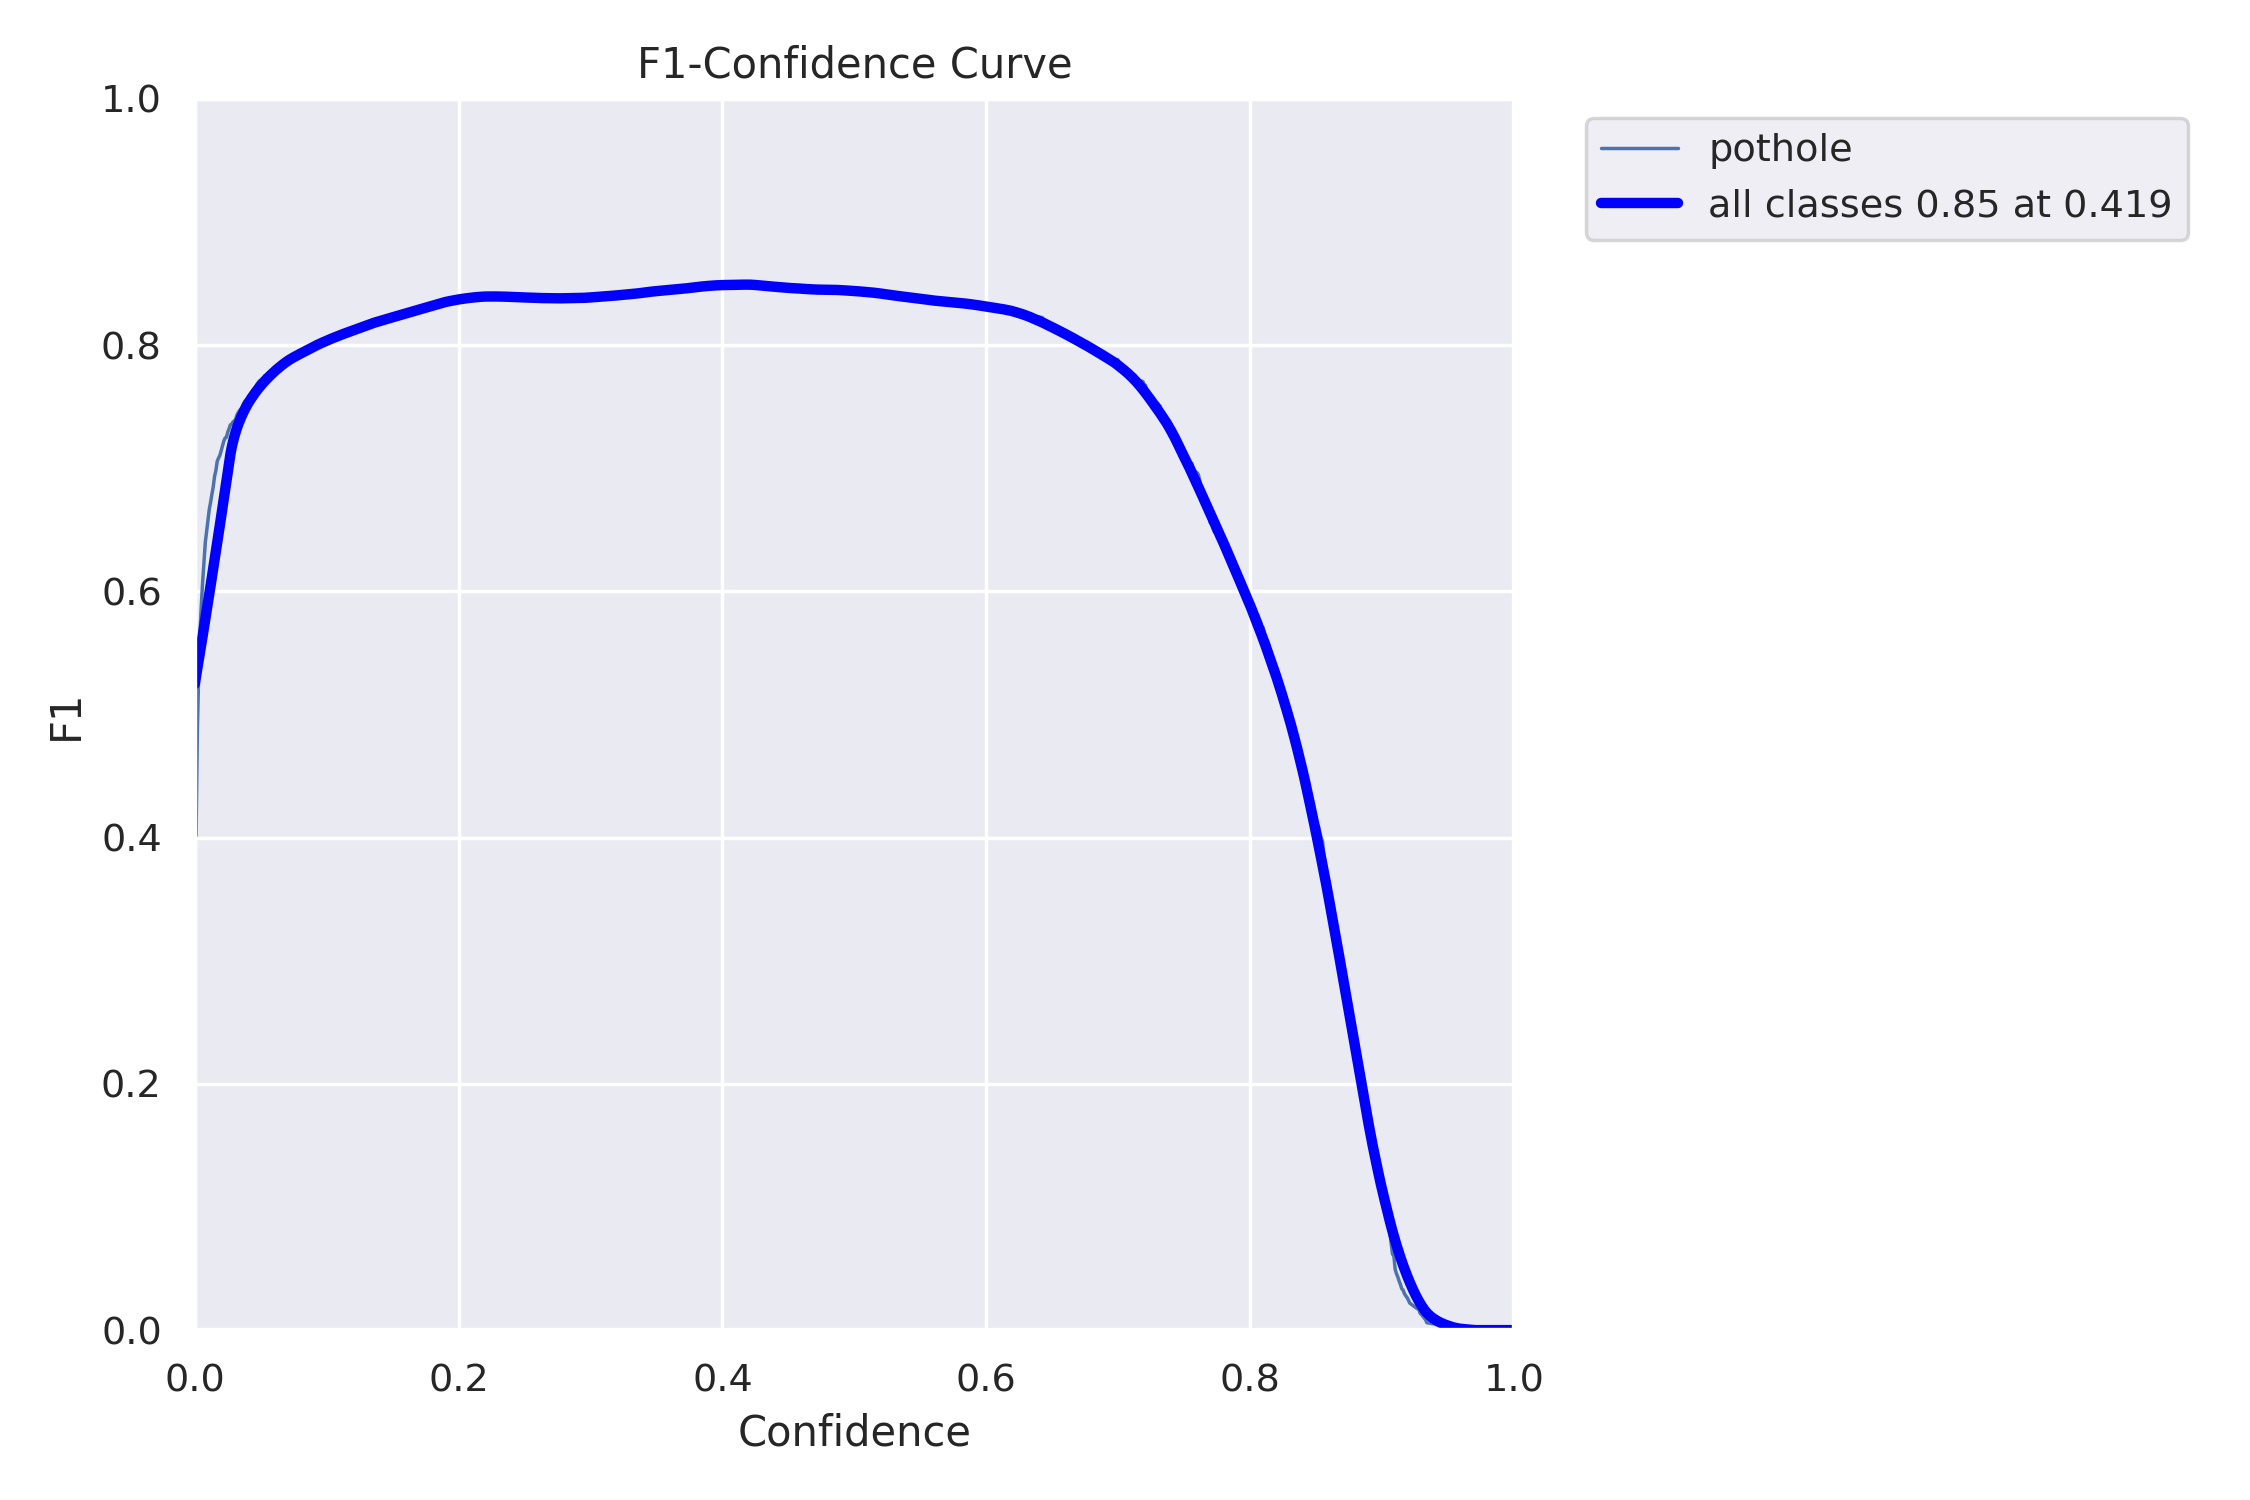

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/F1_curve.png', width=900)

# **Precision and Recall Curve**

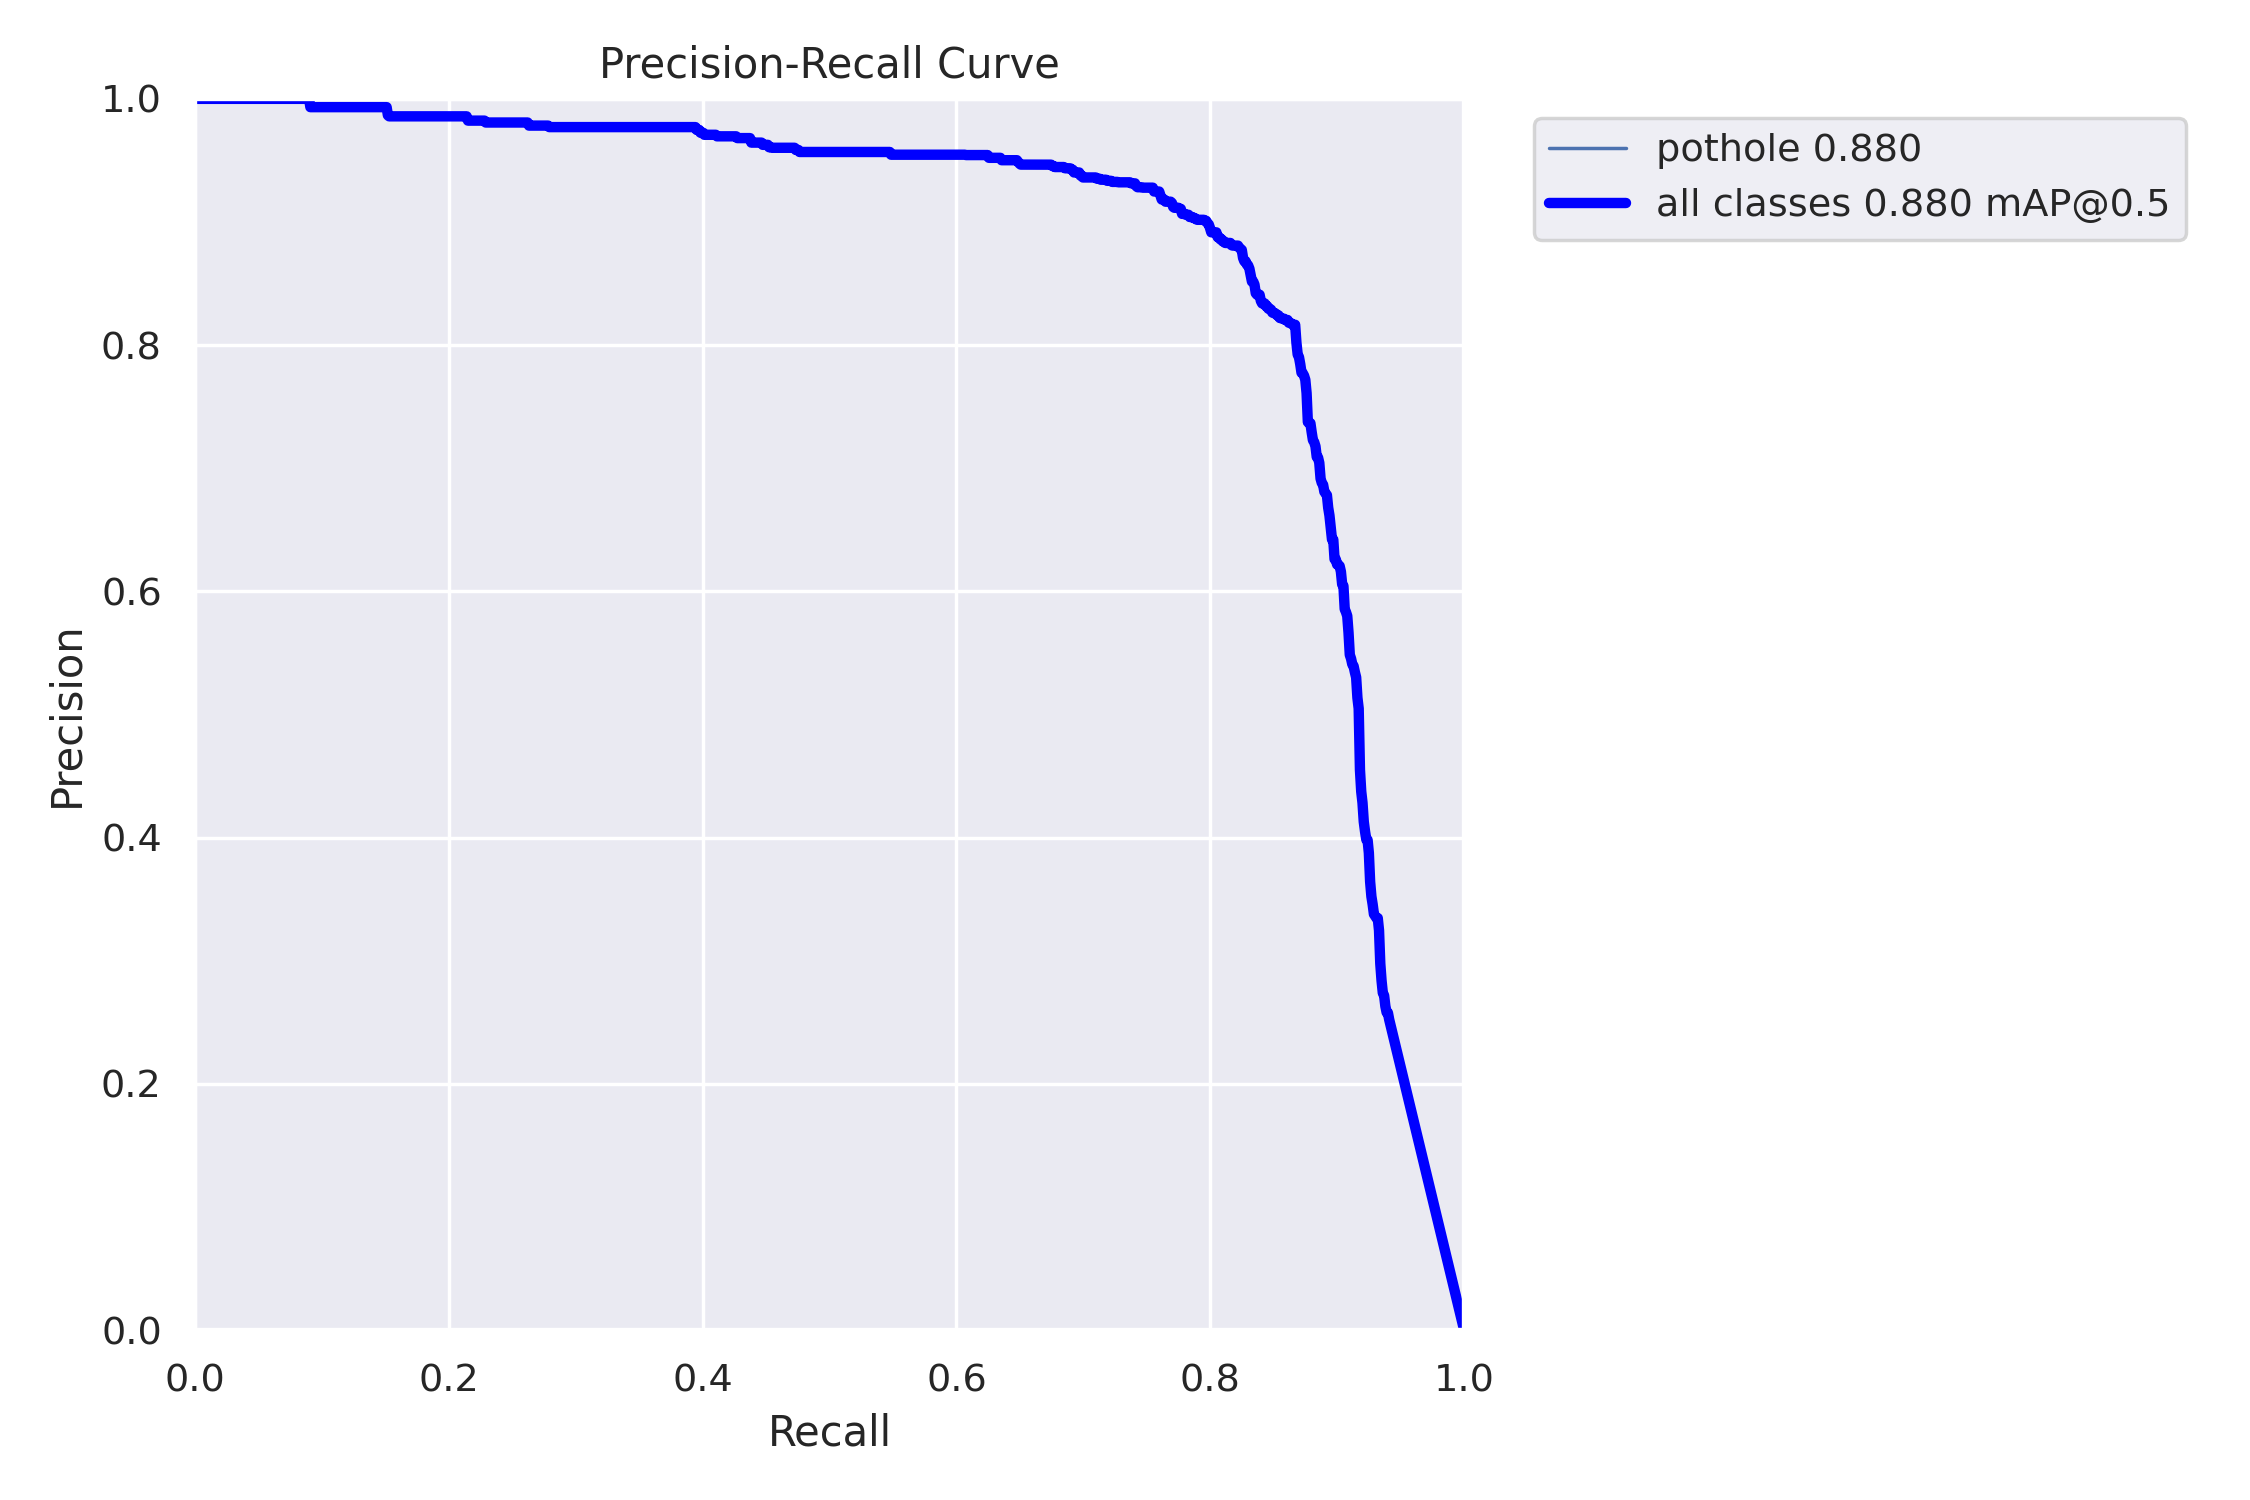

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/PR_curve.png', width=900)

# **Precision Curve**

/content


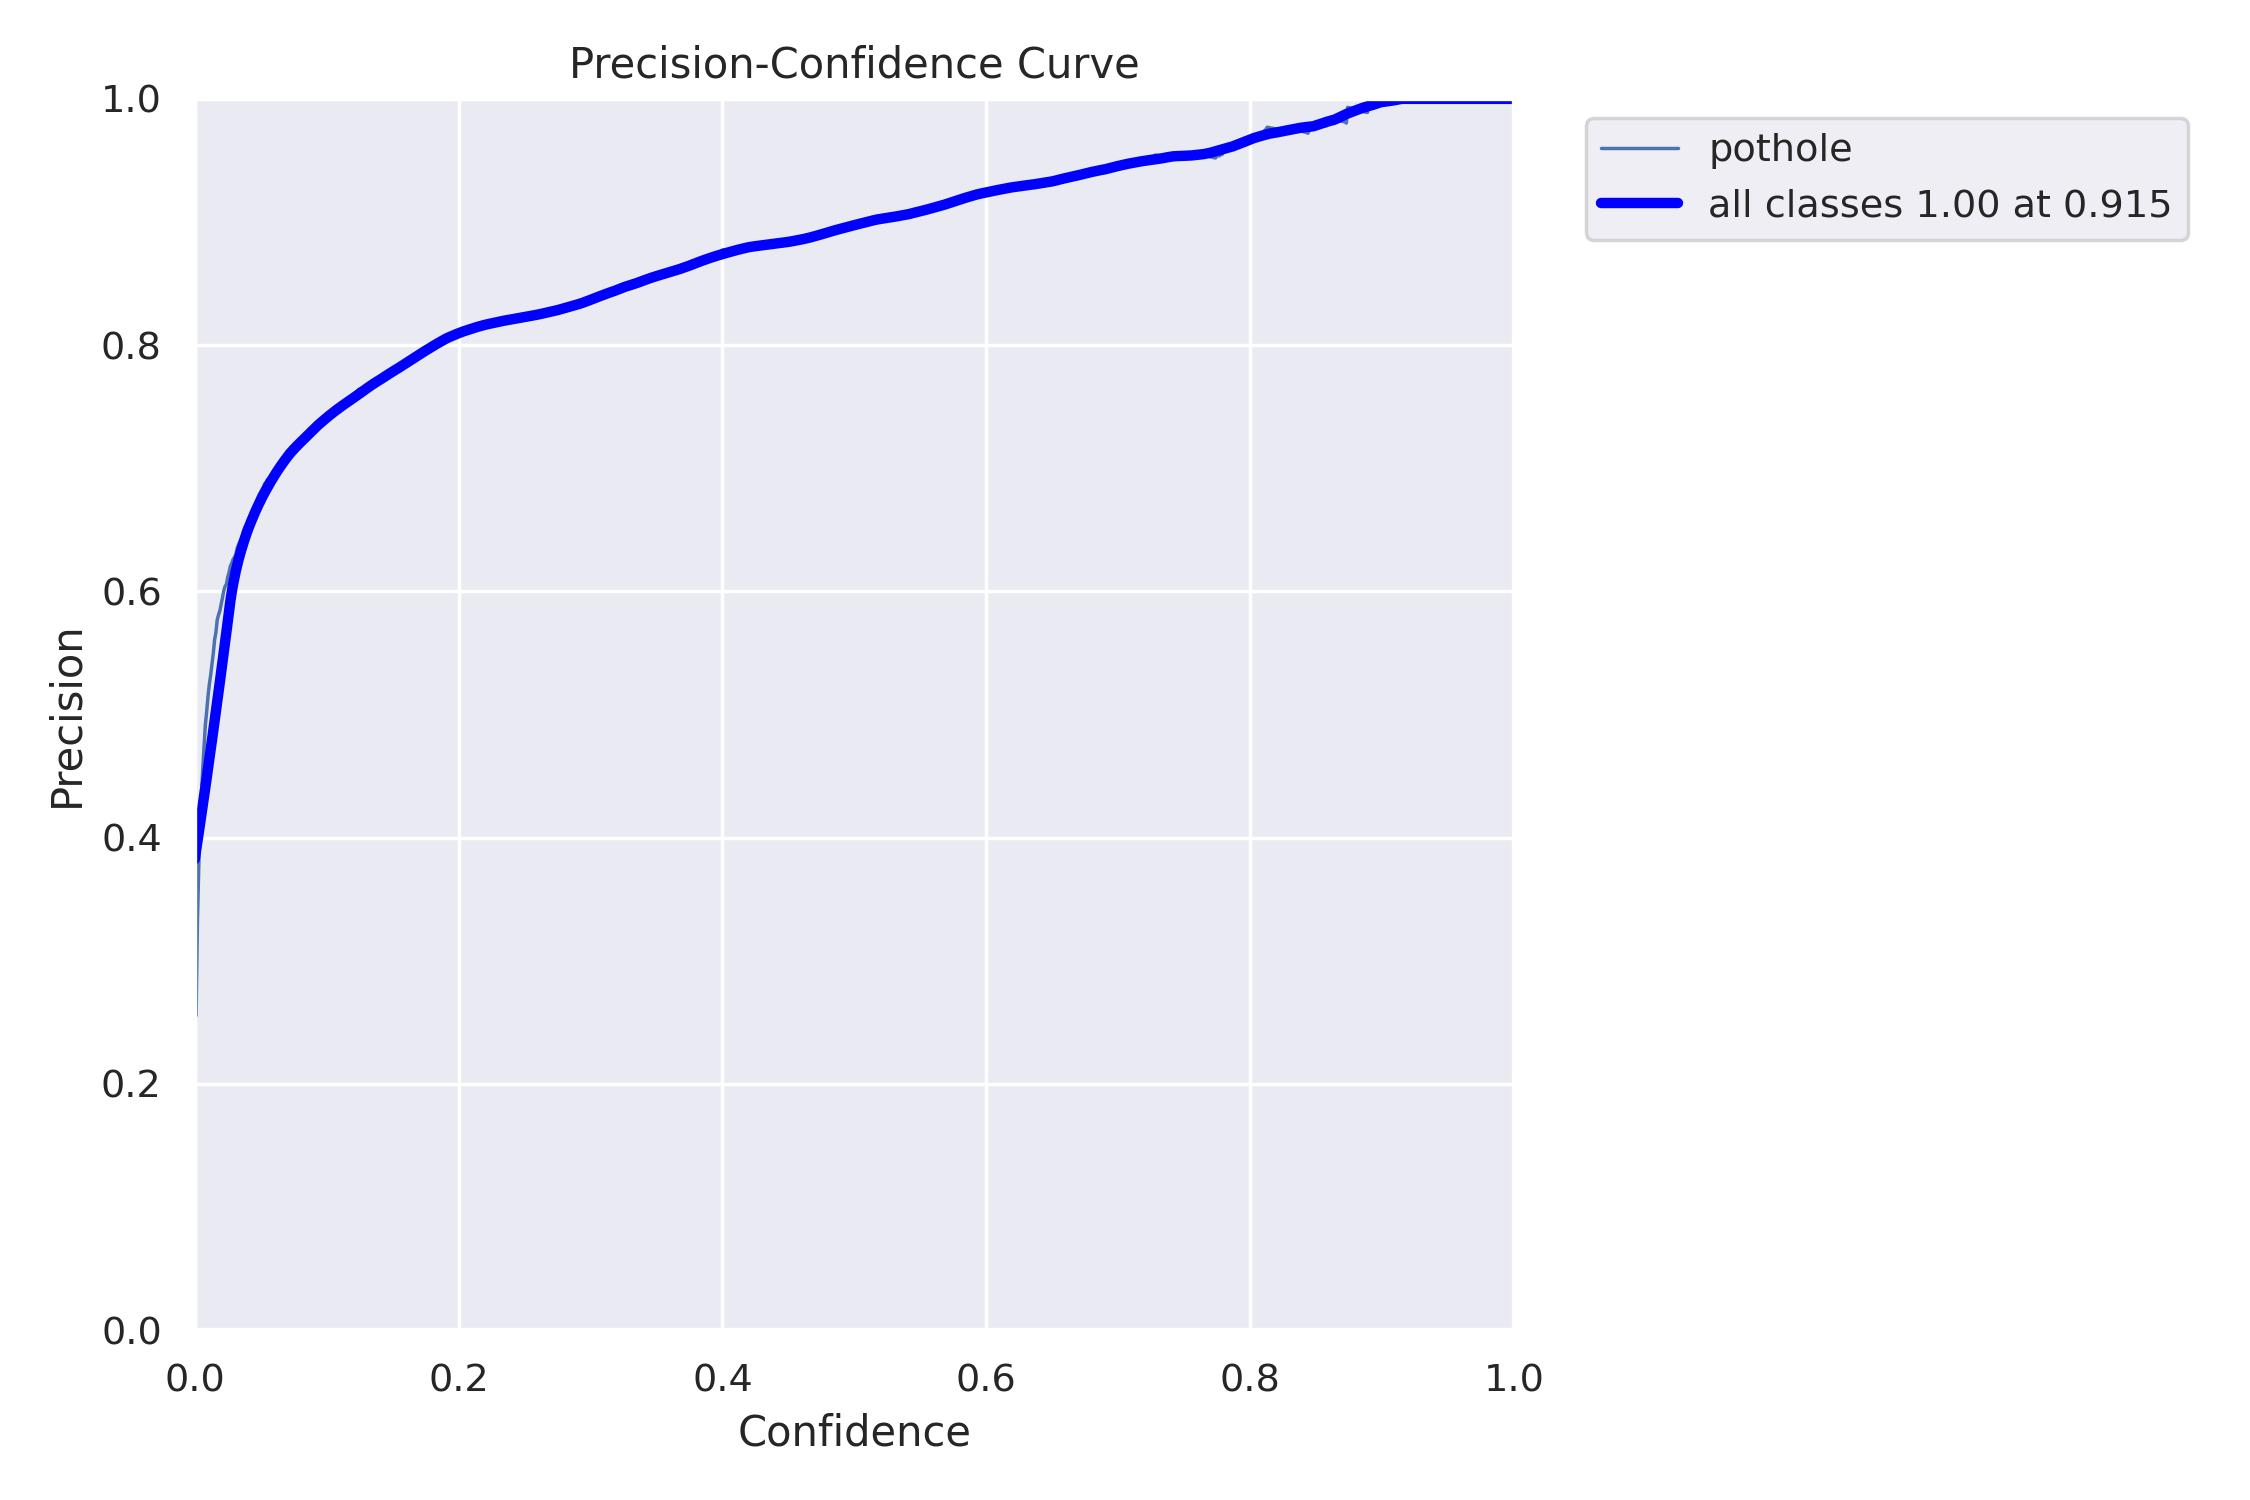

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/P_curve.png', width=900)

# **Confusion Curve**

/content


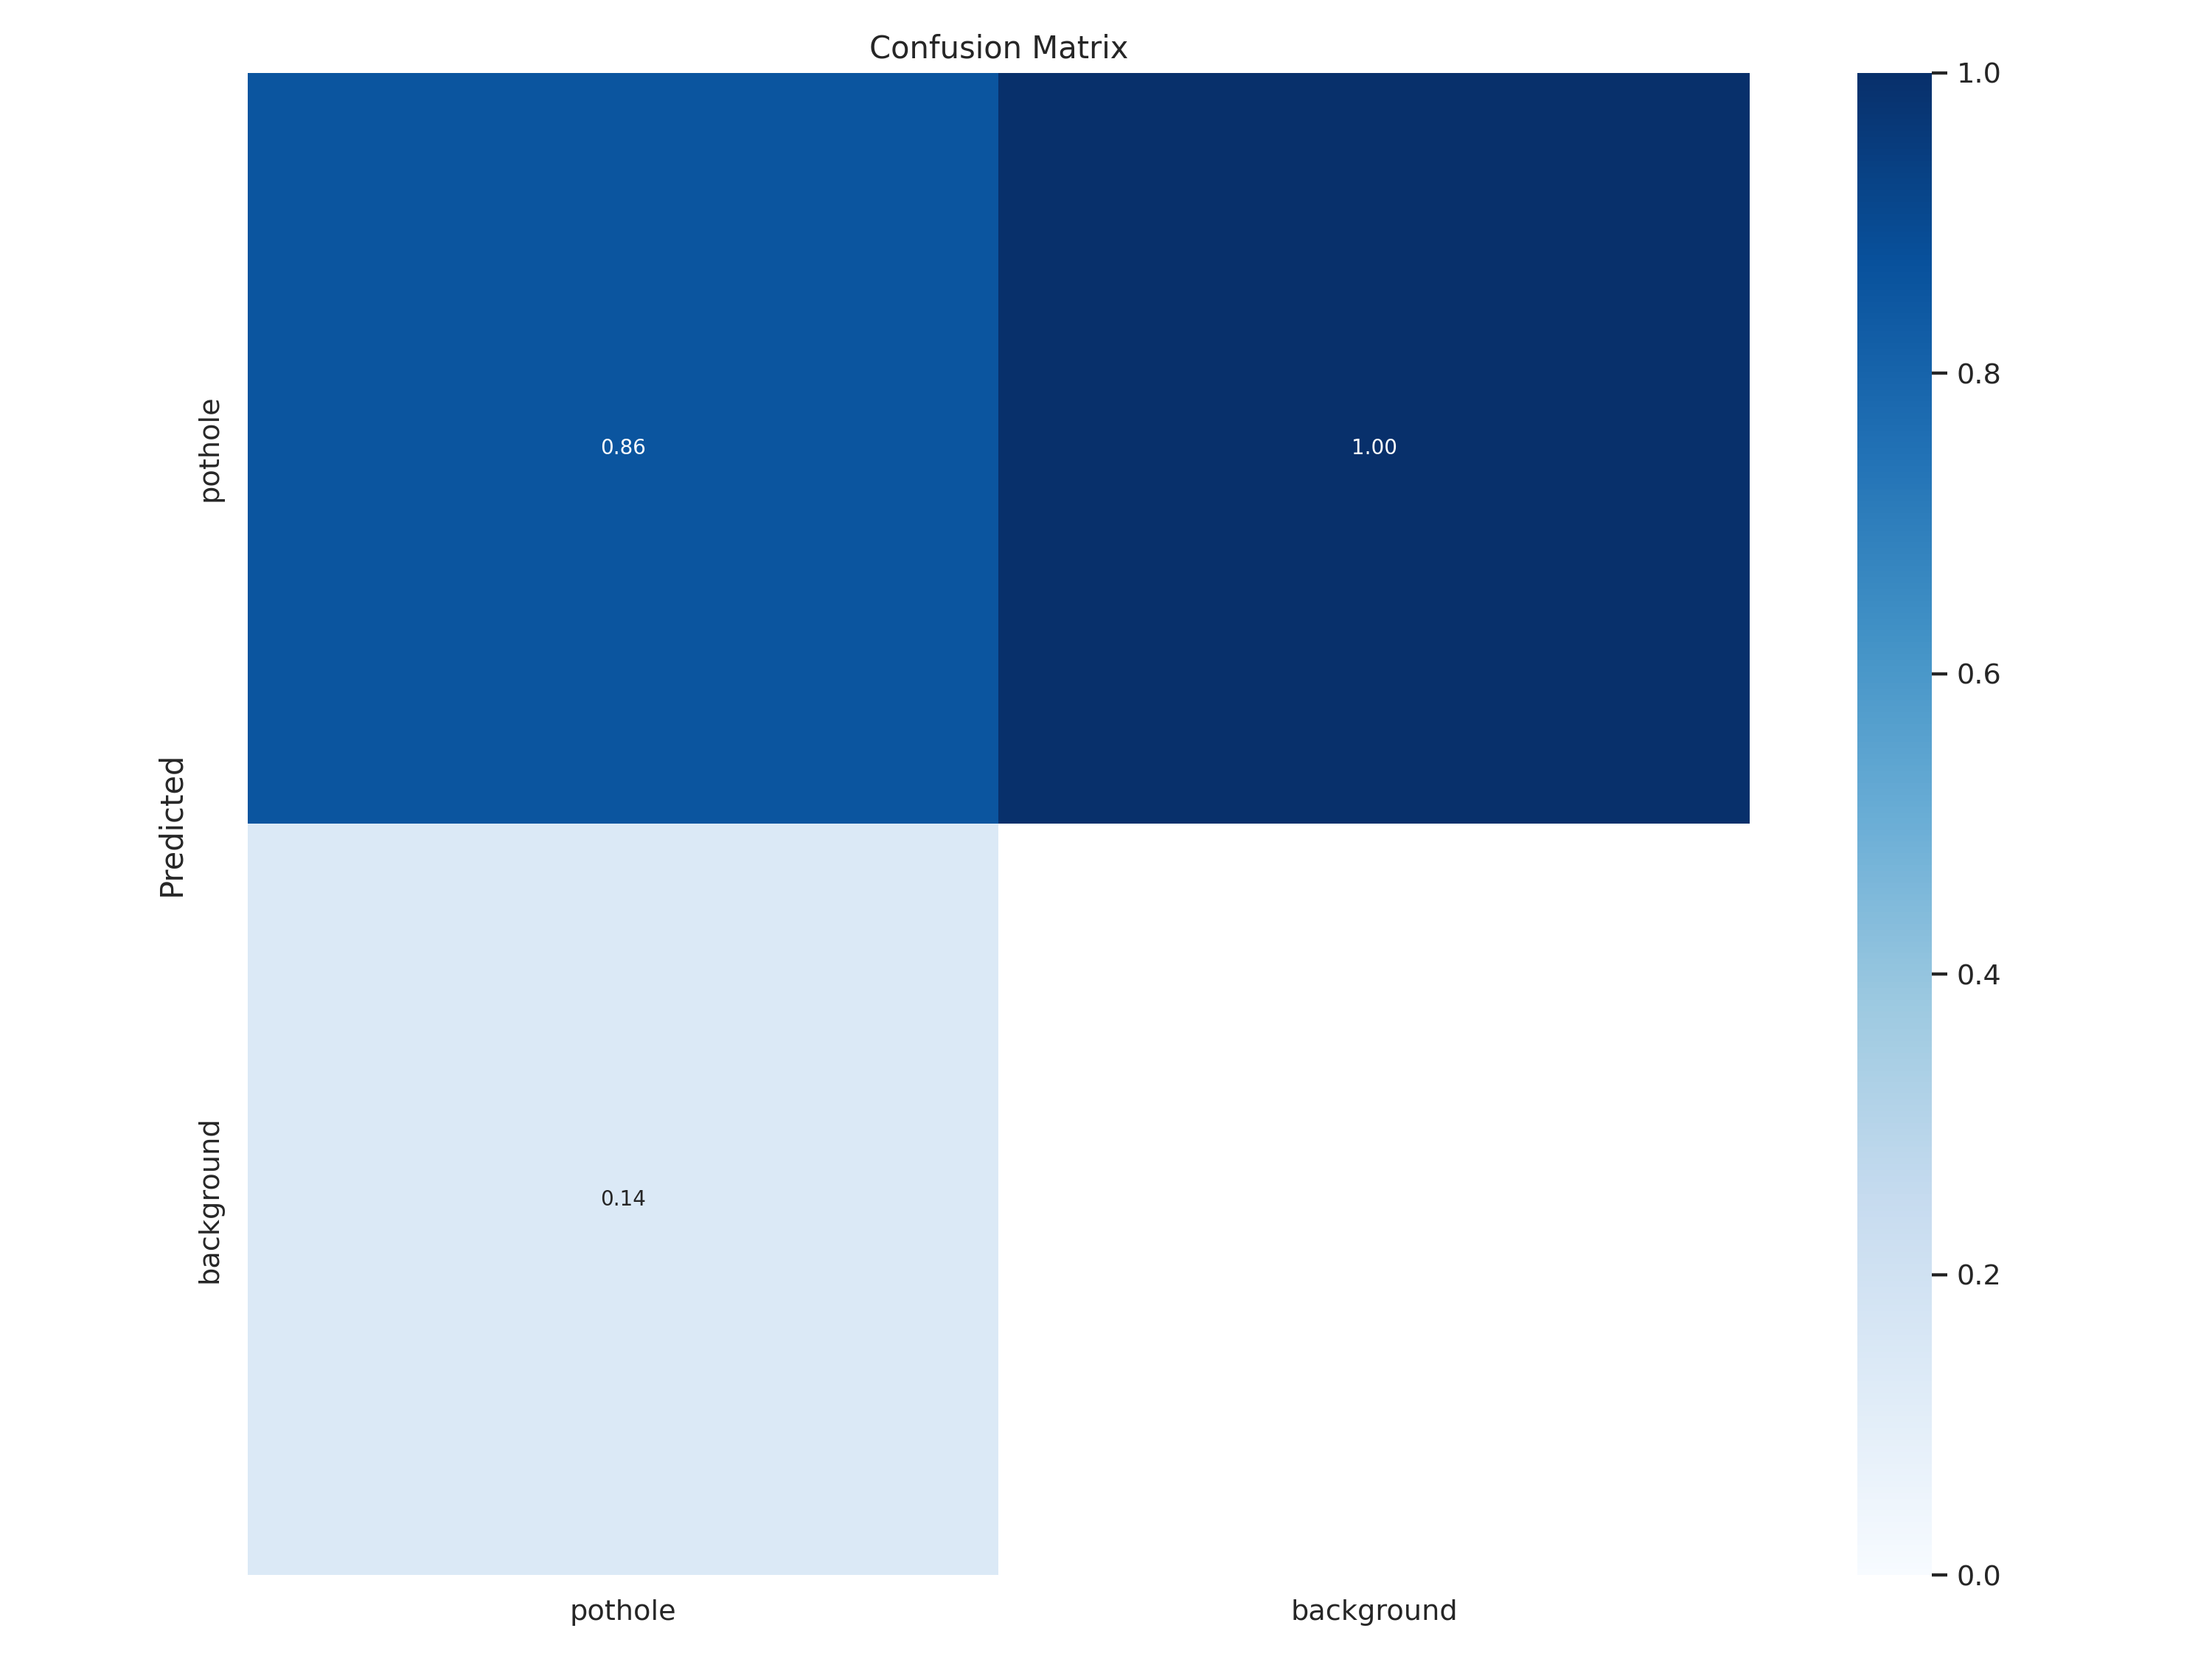

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=900)

# 86% of the time the model detected correctly that there is a pothole, while 14% of the time, when the pothole is there but the model is not able to detect it

# **Training and Validation Curves**

/content


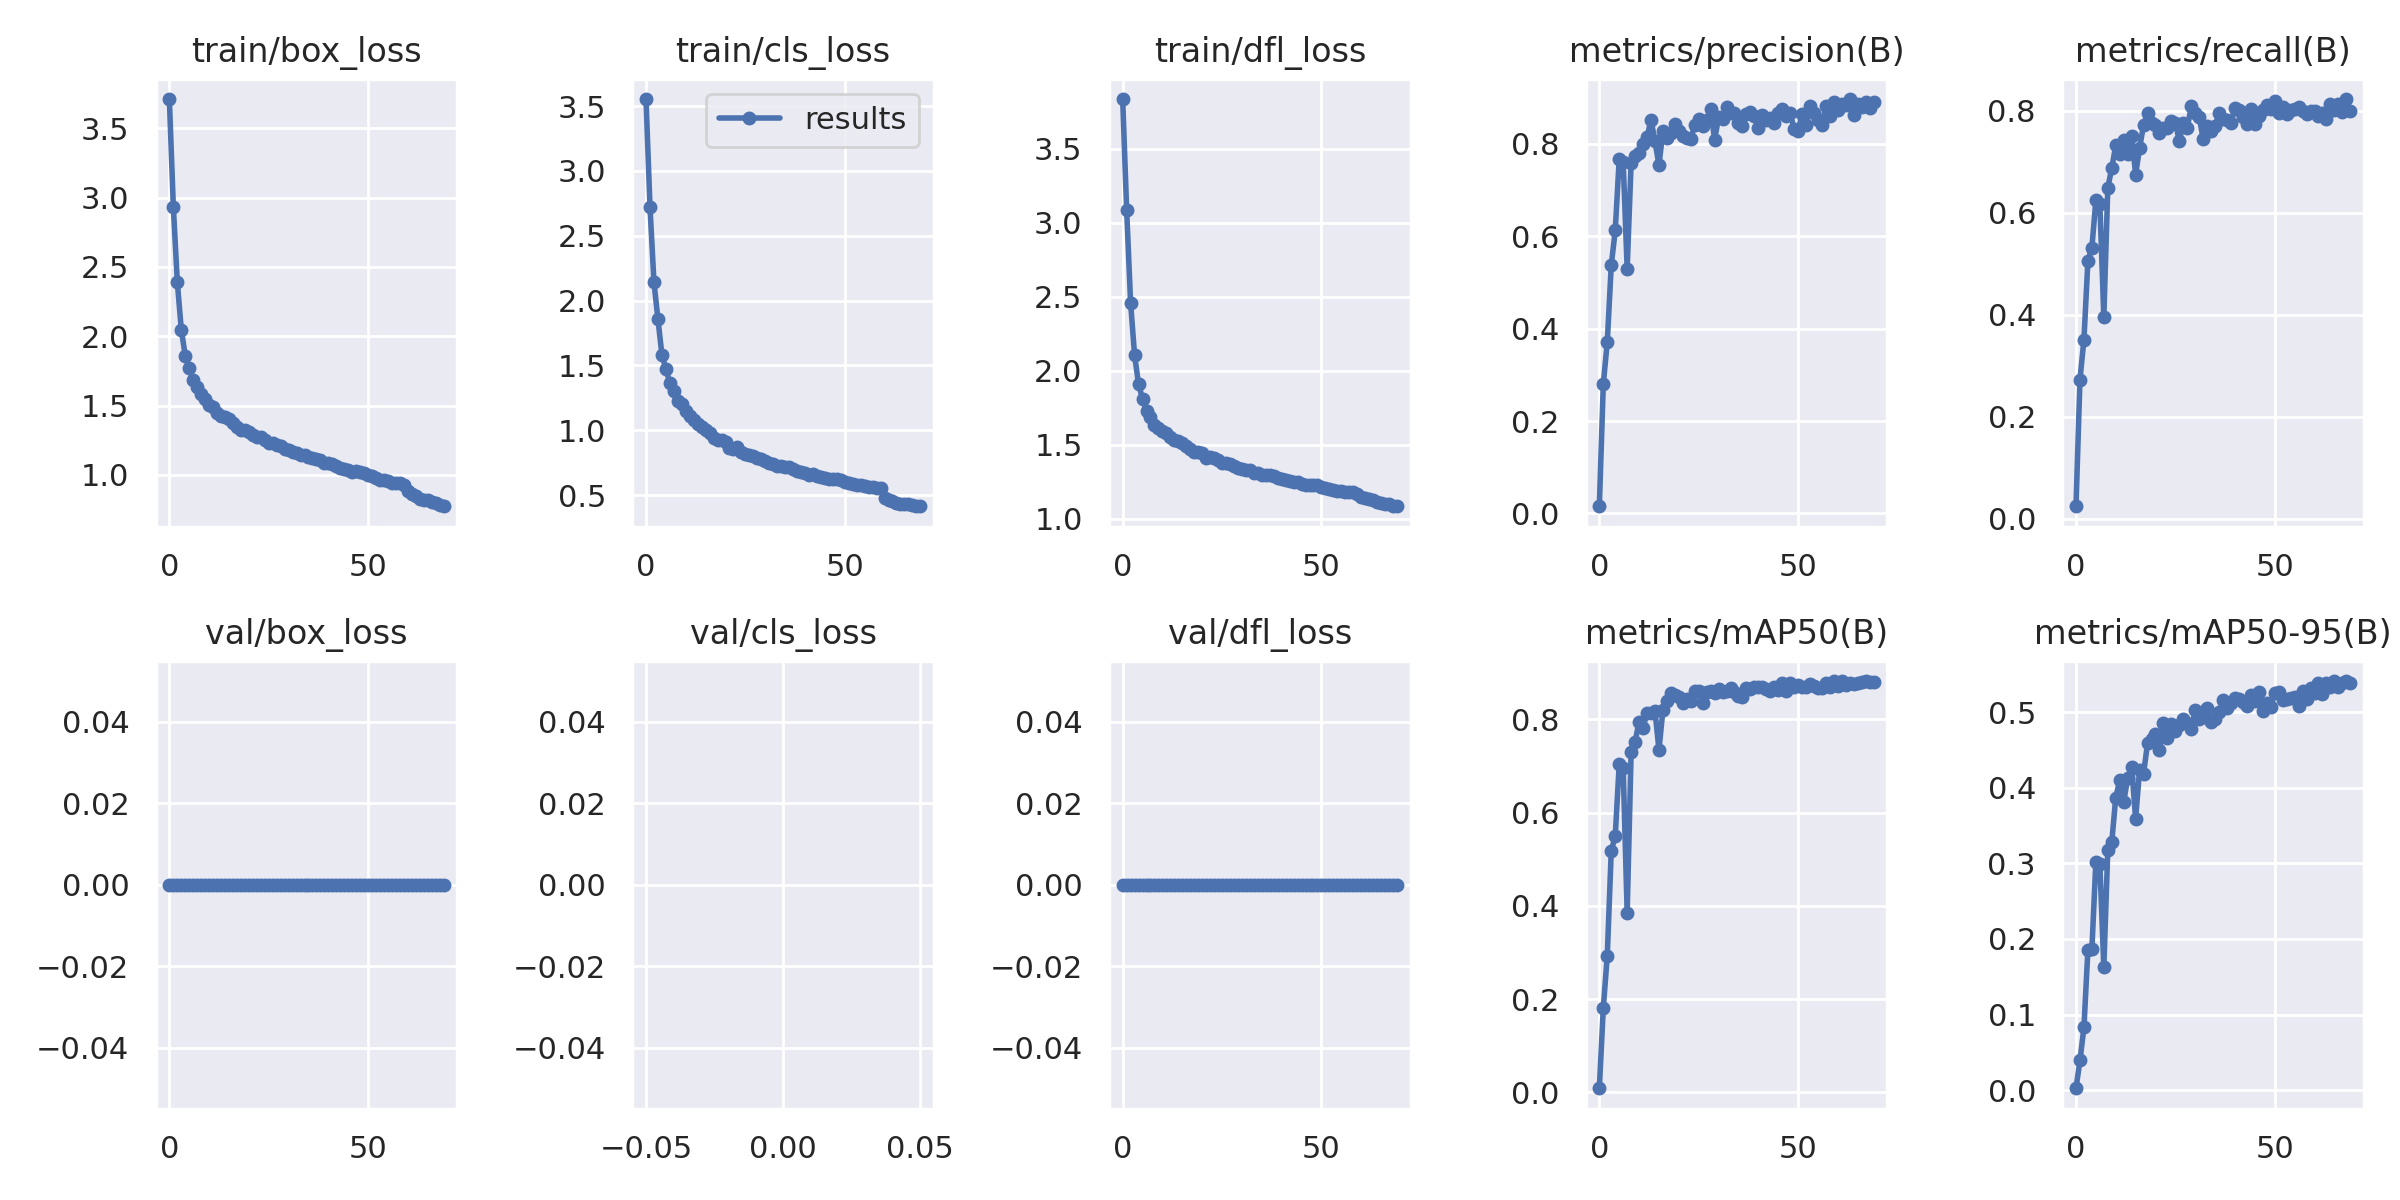

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

# **Prediction on Images**

/content


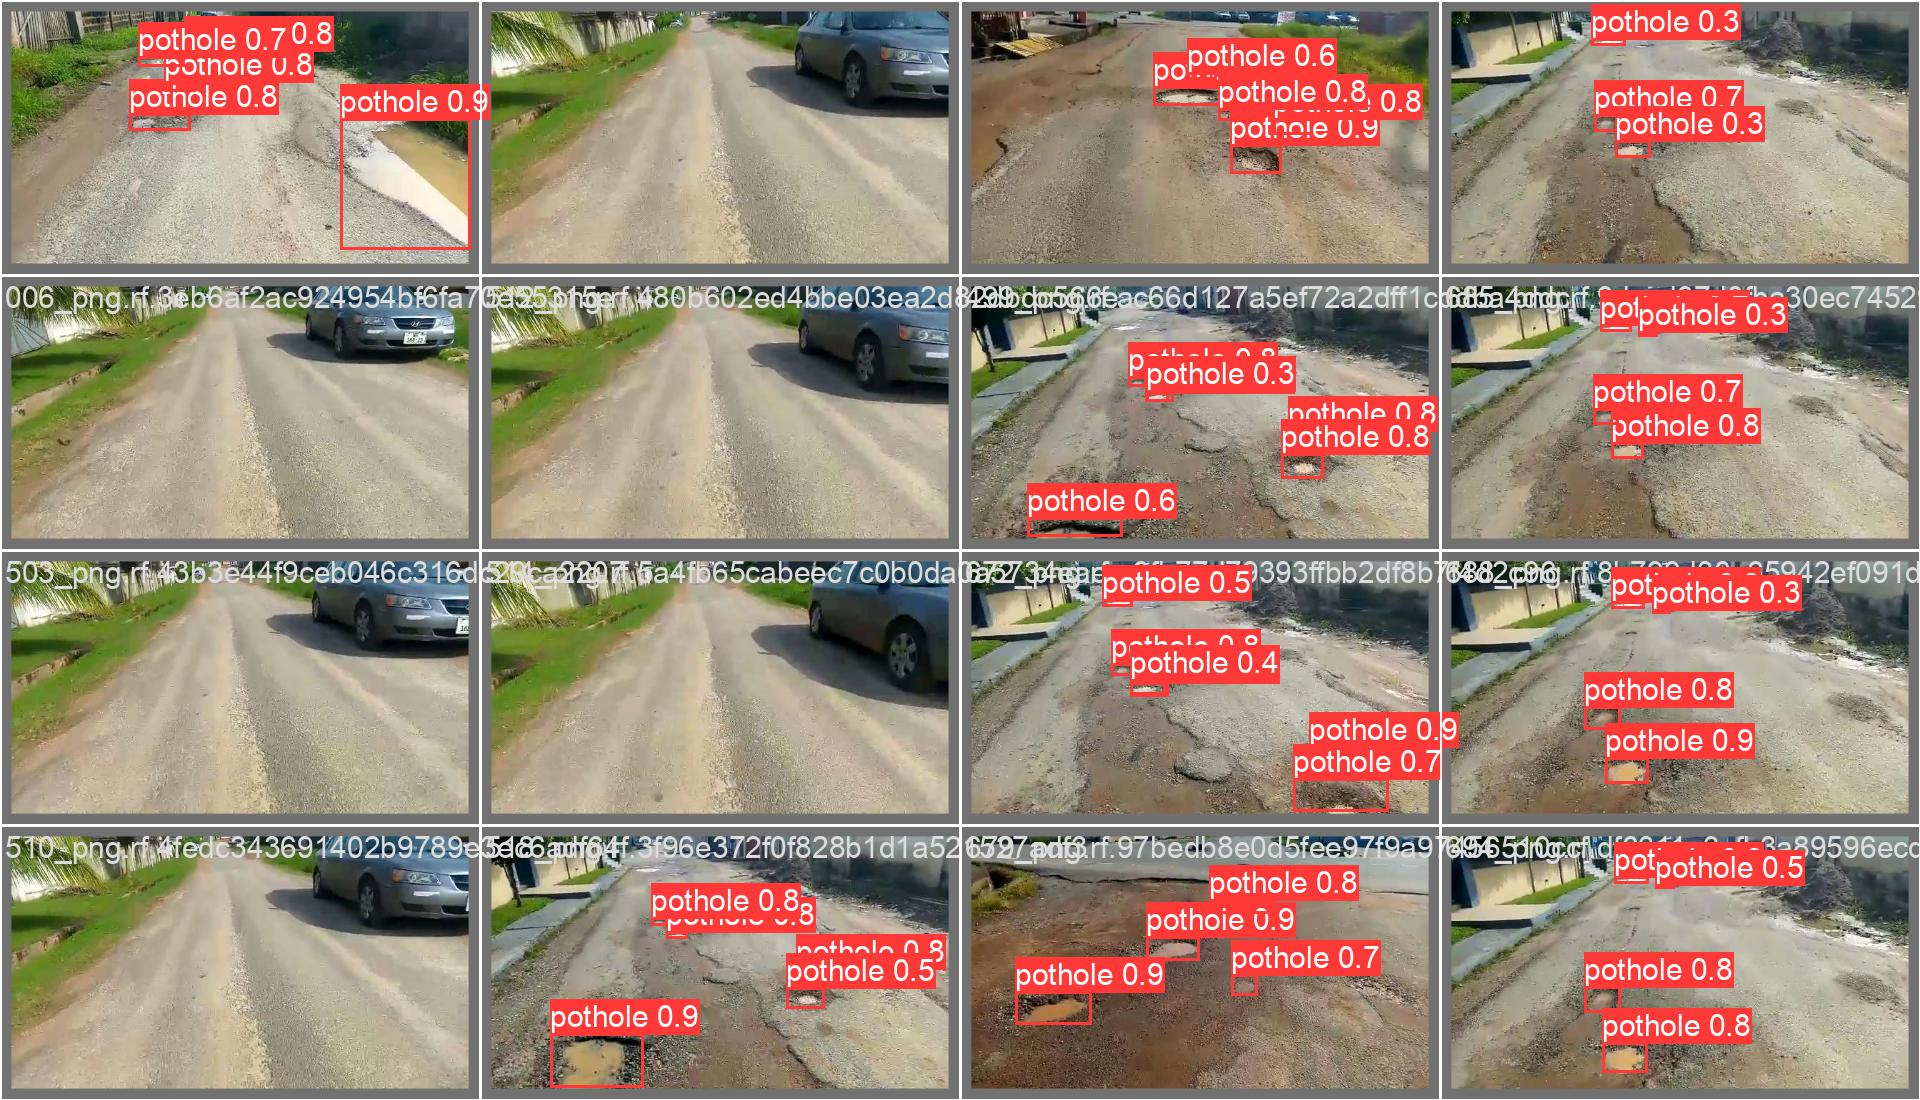

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data=//content/datasets/Pothole-Detection--10/data.yaml

/content
2023-05-25 19:55:49.736412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 19:55:50.877513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Pothole-Detection--10/valid/labels.cache... 273 images, 27 backgrounds, 0 corrupt: 100% 273/273 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:09<00:00,  1.97it/s]
                   all        273        970      0.879      0.819      0.879      0.541
Speed: 1.1

# **Inference with Custom Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.5 source=/content/datasets/Pothole-Detection--10/test/images

/content
2023-05-25 19:56:44.904138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 19:56:45.862794: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/174 /content/datasets/Pothole-Detection--10/test/images/021_png.rf.10df3c2d0c2021c7dd7f90830d1c8ed6.jpg: 352x640 5 potholes, 70.5ms
image 2/174 /content/datasets/Pothole-Detection--10/test/images/032_png.rf.68117aea420bfaf25ab23451efd2fceb.jpg: 352x640 5 potholes, 25.1ms
image 3/174 /content/datasets/Pothole-Detection--10/test/images/036_png.rf.c93894e4c07a11f

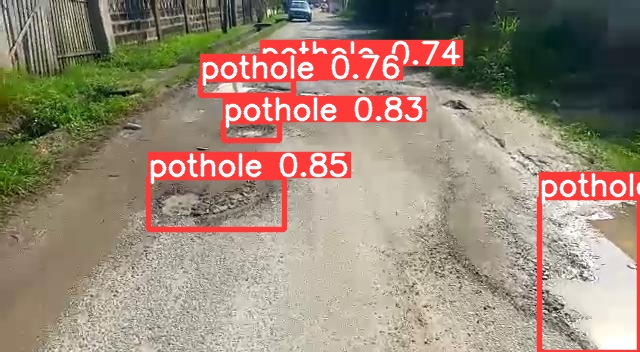

In [ ]:
Image("/content/runs/detect/predict/021_png.rf.10df3c2d0c2021c7dd7f90830d1c8ed6.jpg")

# **Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 18.7MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.5 source='/content/demo.mp4'

/content
2023-05-25 19:58:31.865539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 19:58:32.842543: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 4 potholes, 63.4ms
video 1/1 (2/324) /content/demo.mp4: 384x640 4 potholes, 25.9ms
video 1/1 (3/324) /content/demo.mp4: 384x640 5 potholes, 25.9ms
video 1/1 (4/324) /content/demo.mp4: 384x640 3 potholes, 25.9ms
video 1/1 (5/324) /content/demo.mp4: 384x640 3 potholes, 24.7ms
video 1/1 (6/324) /content/demo.mp4: 384x640 3 pot

# **Display the output video**

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)